Alejandro Alquezar Pitarch - Proyecto Universitario

# Laboratorio: Exploración de un conjunto de datos, correlaciones entre variables y modelos de regresión lineal en R

 ### Introducción

En esta actividad utilizaremos el lenguaje R para explorar una fuente de datos externa, observar correlaciones entre algunas variables y realizar una regresión lineal entre una determinada variable dependiente con respecto a otra variable independiente dentro del conjunto de datos. Así, además de utilizar R para observar medidas estadísticas de tendencia central (media, mediana) y dispersión (desviación típica, varianza), también observaremos correlaciones entre variables gráficamente y mediante el cálculo del coeficiente de determinación R2, así como para crear modelos de regresión lineal y a evaluar la bondad de los modelos mediante el error cuadrático medio.

Vamos a utilizar datos de fuentes de datos abiertas, en este caso, hemos elegido el conjunto de datos de calidad del aire de la Junta de Castilla y León en España.

En primer lugar, vamos a explicar el significado de los datos abiertos y por qué las administraciones públicas los ofrecen. El objetivo de los datos abiertos es proporcionar acceso a la información para que los ciudadanos comprendan cómo funciona la administración y cómo se toman las decisiones, y para que las personas participen en la toma de decisiones, la innovación y el desarrollo de servicios. Estos datos pueden ser utilizados por cualquier ciudadano, empresa, investigador o desarrollador. En cuanto a si tiene sentido que una empresa privada proporcione datos abiertos, depende del caso. Puede ayudar a tener un mayor nivel de innovación y mejorar la transparencia de dicha empresa.

In [2]:
url <- "http://www.datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad_aire_historico/1284212629698.csv"
datos_alejandro_alquezar <- read.csv(url, sep = ";", stringsAsFactors = FALSE, fileEncoding = "UTF-8")

### Comprobación inicial de los datos

In [3]:
dim(datos_alejandro_alquezar)
names(datos_alejandro_alquezar)
head(datos_alejandro_alquezar)

[1] 446014     13

[1] "Fecha"        "CO..mg.m3."   "NO..ug.m3."   "NO2..ug.m3."  "O3..ug.m3."  
 [6] "PM10..ug.m3." "PM25..ug.m3." "SO2..ug.m3."  "Provincia"    "Estación"    
[11] "Latitud"      "Longitud"     "Posición"

,Fecha,CO..mg.m3.,NO..ug.m3.,NO2..ug.m3.,O3..ug.m3.,PM10..ug.m3.,PM25..ug.m3.,SO2..ug.m3.,Provincia,Estación,Latitud,Longitud,Posición
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2020-12-31,0.6,8,16,NA,6,NA,1,Burgos,Burgos1,42.35111,-3.675556,"42.3511111111,-3.67555555556"
2,2020-12-31,NA,2,6,NA,8,NA,4,León,C.T.L.R. - Naredo,42.81667,-5.533333,"42.8166666667,-5.53333333333"
3,2020-12-31,NA,8,2,65,4,NA,2,León,Carracedelo,42.55861,-6.725556,"42.5586111111,-6.72555555556"
4,2020-12-31,NA,1,4,58,21,NA,17,León,La Robla,42.80167,-5.625000,"42.8016666667,-5.625"
5,2020-12-31,NA,1,1,NA,6,NA,2,León,Tudela Veguin-Tudela Veguin,42.80167,-5.648889,"42.8016666667,-5.64888888889"
6,2020-12-31,NA,2,2,62,6,NA,6,León,Valderas,42.07972,-5.448889,"42.0797222222,-5.44888888889"


El dataset contiene 446014 registros y hay en total 13 atributos. El atributo Fecha indica la fecha en la que se realizó el estudio y es del tipo carácter (por ahora). Los atributos CO..mg.m3, NO..ug.m3, NO2..ug.m3, O3..ug.m3, PM10..ug.m3, PM25..ug.m3, SO2..ug.m3 se refieren a las partículas en suspensión que hay en el aire y la primera es del tipo numeric y las demás integer. Y los atributos Provincia, Estación, Latitud, Longitud y Posición se refieren a en que estación se ha realizado cada estudio, adjuntando su posición. Provincia, Estación y Posición son del tipo carácter y Latitud y Longitud del tipo numérico.

### Primeras mediciones

In [4]:
summary(datos_alejandro_alquezar$PM10..ug.m3.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   11.00   18.00   22.69   29.00  557.00  101435 

In [5]:
summary(datos_alejandro_alquezar)

    Fecha             CO..mg.m3.       NO..ug.m3.       NO2..ug.m3.    
 Length:446014      Min.   : 0.0     Min.   :-441.00   Min.   :  0.00  
 Class :character   1st Qu.: 0.3     1st Qu.:   2.00   1st Qu.:  8.00  
 Mode  :character   Median : 0.7     Median :   5.00   Median : 16.00  
                    Mean   : 0.9     Mean   :  13.23   Mean   : 21.41  
                    3rd Qu.: 1.1     3rd Qu.:  15.00   3rd Qu.: 29.00  
                    Max.   :25.1     Max.   : 634.00   Max.   :249.00  
                    NA's   :344856   NA's   :30984     NA's   :32517   
   O3..ug.m3.      PM10..ug.m3.     PM25..ug.m3.     SO2..ug.m3.     
 Min.   :  0.00   Min.   :  0.00   Min.   :  0.0    Min.   :-791.00  
 1st Qu.: 37.00   1st Qu.: 11.00   1st Qu.:  5.0    1st Qu.:   2.00  
 Median : 54.00   Median : 18.00   Median :  9.0    Median :   5.00  
 Mean   : 52.62   Mean   : 22.69   Mean   : 13.7    Mean   :   9.09  
 3rd Qu.: 68.00   3rd Qu.: 29.00   3rd Qu.: 15.0    3rd Qu.:  11.00  
 Max

En el caso de PM10..ug.m3 tenemos que la mediana es 18, esto significa que el 50% de los valores de este atributo son iguales o inferiores a 18. Por otro lado, observamos que la media es 22.69, que es más grande que el valor de la mediana, los que nos puede indicar que existan valores muy altos que estén sesgando la media hacia arriba. También tenemos los percentiles, que nos indican que el 25% de los datos son iguales o inferiores a 11 y el 75% iguales o inferiores a 29.
En el caso de PM25..ug.m3 tenemos que la mediana es 9, por lo tanto, el 50% de los datos son iguales o inferiores a 9. Observamos también que nuevamente la media vuelve a ser superior a la mediana, en este caso 13.7. Finalmente, tenemos que el primer cuartil (25% de los datos) es 5 y el tercer cuartil (75% de los datos) es 15.
PM10..ug.m3 tiene un valor medio superior en este caso.

### Formateo de datos

In [6]:
datos_alejandro_alquezar$Fecha <- as.Date(datos_alejandro_alquezar$Fecha, "%Y-%m-%d")
datos_alejandro_alquezar$CO..mg.m3. <- as.double(datos_alejandro_alquezar$CO..mg.m3.)
datos_alejandro_alquezar$NO..ug.m3. <- as.integer(datos_alejandro_alquezar$NO..ug.m3.)
head(datos_alejandro_alquezar)

,Fecha,CO..mg.m3.,NO..ug.m3.,NO2..ug.m3.,O3..ug.m3.,PM10..ug.m3.,PM25..ug.m3.,SO2..ug.m3.,Provincia,Estación,Latitud,Longitud,Posición
,<date>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2020-12-31,0.6,8,16,NA,6,NA,1,Burgos,Burgos1,42.35111,-3.675556,"42.3511111111,-3.67555555556"
2,2020-12-31,NA,2,6,NA,8,NA,4,León,C.T.L.R. - Naredo,42.81667,-5.533333,"42.8166666667,-5.53333333333"
3,2020-12-31,NA,8,2,65,4,NA,2,León,Carracedelo,42.55861,-6.725556,"42.5586111111,-6.72555555556"
4,2020-12-31,NA,1,4,58,21,NA,17,León,La Robla,42.80167,-5.625000,"42.8016666667,-5.625"
5,2020-12-31,NA,1,1,NA,6,NA,2,León,Tudela Veguin-Tudela Veguin,42.80167,-5.648889,"42.8016666667,-5.64888888889"
6,2020-12-31,NA,2,2,62,6,NA,6,León,Valderas,42.07972,-5.448889,"42.0797222222,-5.44888888889"


### Diagrama de cajas

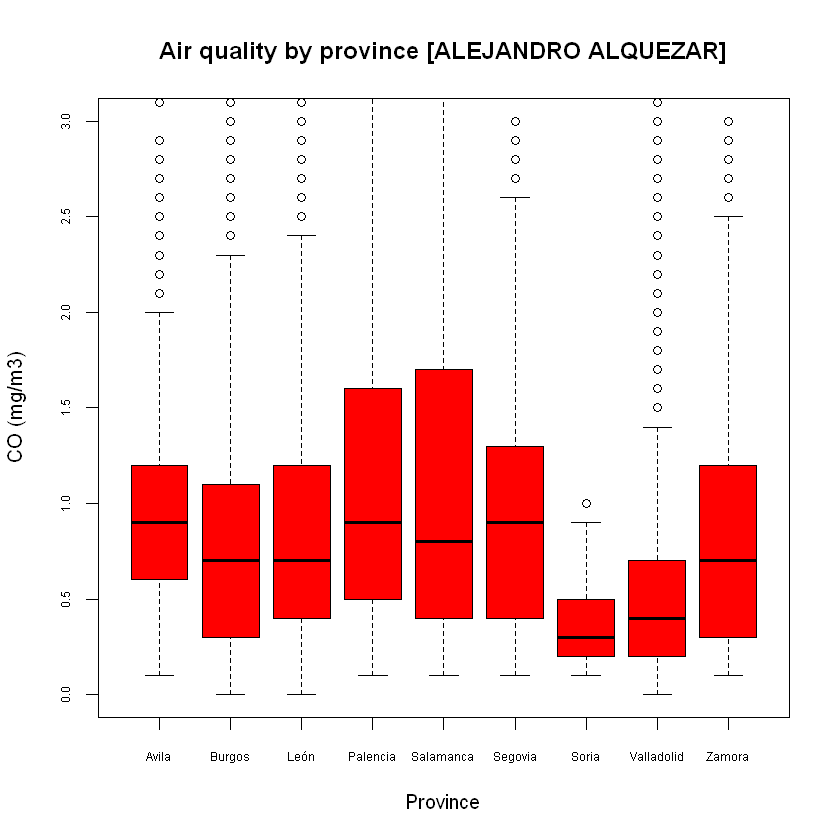

In [7]:
boxplot(CO..mg.m3. ~ Provincia, data = datos_alejandro_alquezar, col = "red", xlab = "Province", ylab = "CO (mg/m3)", ylim = c(0, 3), main = "Air quality by province [ALEJANDRO ALQUEZAR]", cex.axis=0.6)

Es un diagrama de caja que nos sirve para identificar valores atípicos y comparar distribuciones de una manera visual. La provincia con valor de monóxido de carbono mínimo es Soria y la provincia con el percentil 75 más alto es Salamanca.

### PM10 en Zamora

Nos centramos ahora en la medida PM10 para la provincia de Zamora durante los años 2014 y 2015.

In [8]:
datosZA2014 <- subset(datos_alejandro_alquezar, Provincia == "Zamora" & Estación == "Zamora 2" & Fecha >= "2014-01-01" & Fecha <= "2014-12-31")
datosZA2015 <- subset(datos_alejandro_alquezar, Provincia == "Zamora" & Estación == "Zamora 2" & Fecha >= "2015-01-01" & Fecha <= "2015-12-31")

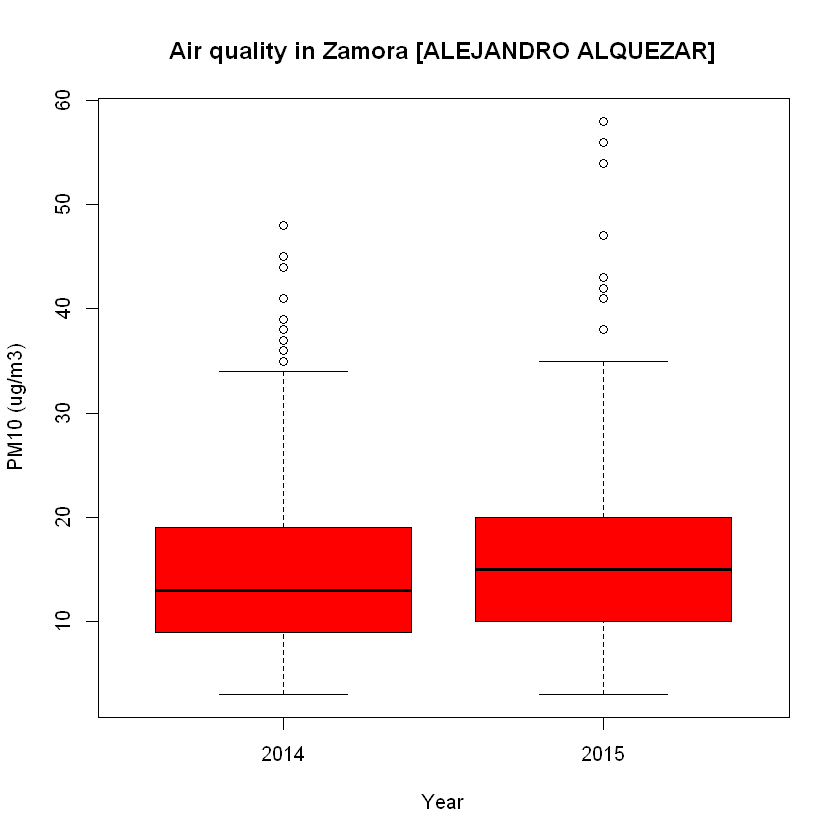

In [9]:
boxplot(datosZA2014$PM10..ug.m3., datosZA2015$PM10..ug.m3., col = "red", xlab = "Year", ylab = "PM10 (ug/m3)", names = c("2014", "2015"), main = "Air quality in Zamora [ALEJANDRO ALQUEZAR]")

En 2014 se obtuvo un valor mediano más bajo. En 2015 se obtuvo un valor máximo más alto. Los puntos por encima del valor máximo se consideran valores atípicos (outliers) y son valores que caen fuera del rango esperado y que pueden causar errores.

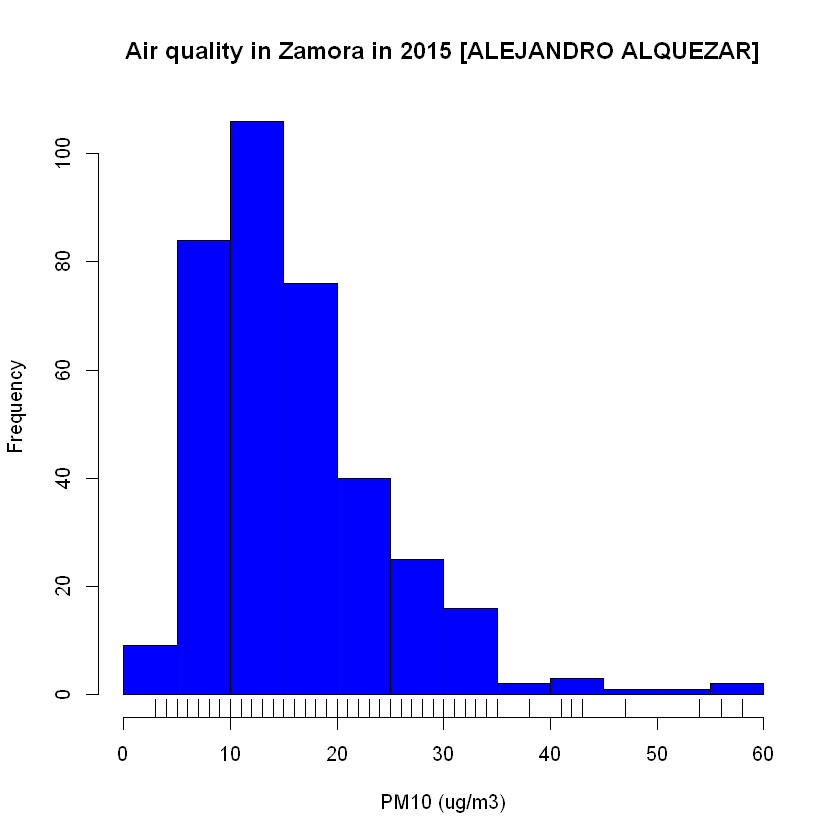

In [10]:
hist(datosZA2015$PM10..ug.m3., col = "blue", xlab = "PM10 (ug/m3)", ylab = "Frequency", main = "Air quality in Zamora in 2015 [ALEJANDRO ALQUEZAR]")
rug(datosZA2015$PM10..ug.m3.)

El gráfico de arriba es un gráfico de barras que nos indica la cantidad de veces que se repiten los valores de PM10 (ug/m3). El rango de medidas más frecuentes se encuentra entre el 10 y el 15.

### Diagrama de dispersión

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


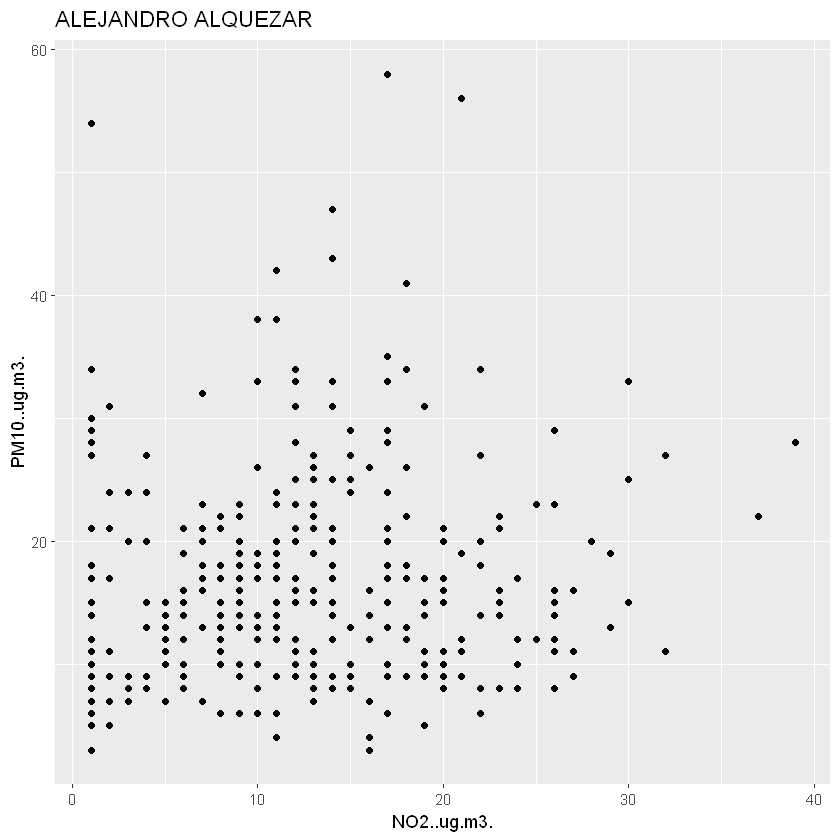

In [11]:
library(ggplot2)
qplot(NO2..ug.m3., PM10..ug.m3., data = datosZA2015, main = "ALEJANDRO ALQUEZAR")

El gráfico superior es un diagrama de dispersión que nos ayuda a visualizar la correlación entre las dos variables indicadas. En este caso el gráfico muestra una relación positiva.

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


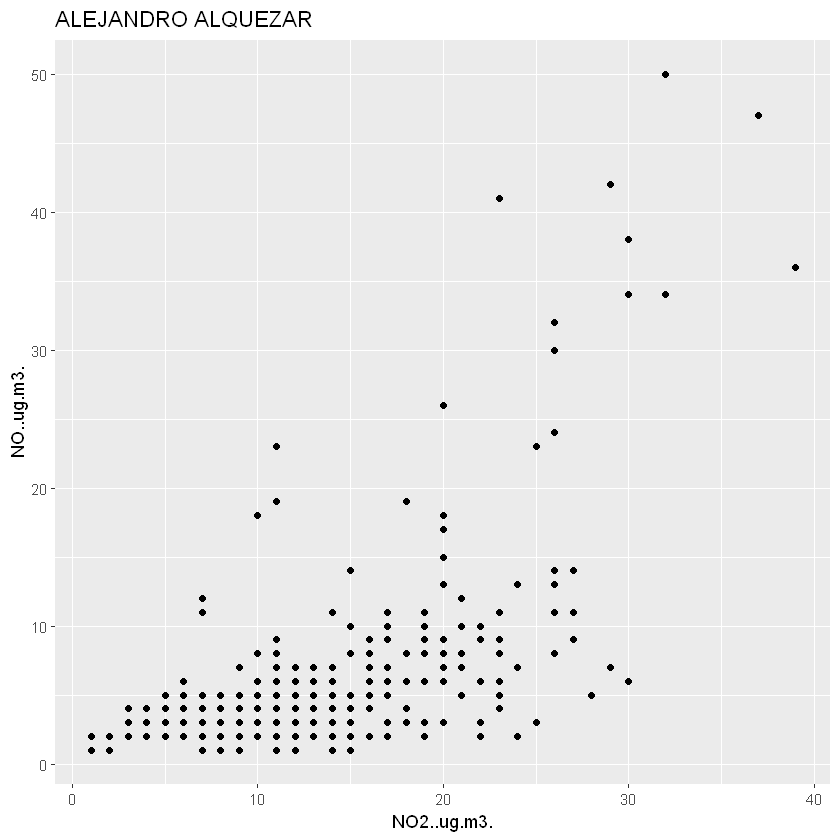

In [12]:
qplot(NO2..ug.m3., NO..ug.m3., data = datosZA2015, main = "ALEJANDRO ALQUEZAR")

Existe una correlación positiva exponencial y tiene una mayor correlación que el anterior.

In [14]:
summary(datosZA2015)

     Fecha              CO..mg.m3.    NO..ug.m3.      NO2..ug.m3.   
 Min.   :2015-01-01   Min.   : NA   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2015-04-02   1st Qu.: NA   1st Qu.: 2.000   1st Qu.: 7.00  
 Median :2015-07-02   Median : NA   Median : 3.000   Median :12.00  
 Mean   :2015-07-02   Mean   :NaN   Mean   : 5.467   Mean   :12.16  
 3rd Qu.:2015-10-01   3rd Qu.: NA   3rd Qu.: 6.000   3rd Qu.:17.00  
 Max.   :2015-12-31   Max.   : NA   Max.   :50.000   Max.   :39.00  
                      NA's   :365   NA's   :3        NA's   :3      
   O3..ug.m3.      PM10..ug.m3.    PM25..ug.m3.  SO2..ug.m3.   
 Min.   :  2.00   Min.   : 3.00   Min.   : NA   Min.   :1.000  
 1st Qu.: 39.00   1st Qu.:10.00   1st Qu.: NA   1st Qu.:1.000  
 Median : 65.00   Median :15.00   Median : NA   Median :2.000  
 Mean   : 58.29   Mean   :16.49   Mean   :NaN   Mean   :1.921  
 3rd Qu.: 77.00   3rd Qu.:20.00   3rd Qu.: NA   3rd Qu.:2.000  
 Max.   :121.00   Max.   :58.00   Max.   : NA   Max.   :5.000  


### Datos incompletos, correlación y regresión lineal

Primero que todo vamos a mirar las fechas en la que los datos están incompletos

In [16]:
datosZA2015$Fecha[is.na(datosZA2015$PM10..ug.m3.)]
datosZA2015$Fecha[is.na(datosZA2015$NO2..ug.m3.)]
datosZA2015$Fecha[is.na(datosZA2015$NO..ug.m3.)]

Date of length 0

[1] "2015-03-19" "2015-03-18" "2015-03-17"

[1] "2015-03-19" "2015-03-18" "2015-03-17"

Reemplazamos los datos que faltan uno por uno por la media del resto de los valores.

In [17]:
datosZA2015PM10 <- datosZA2015$PM10..ug.m3.
datosZA2015NO2 <- datosZA2015$NO2..ug.m3.
datosZA2015NO <- datosZA2015$NO..ug.m3.
mediaPM10 <- mean(datosZA2015PM10[!is.na(datosZA2015PM10)])
mediaNO2 <- mean(datosZA2015NO2[!is.na(datosZA2015NO2)])
mediaNO <- mean(datosZA2015NO[!is.na(datosZA2015NO)])
datosZA2015PM10[is.na(datosZA2015PM10)] <- mediaPM10
datosZA2015NO2[is.na(datosZA2015NO2)] <- mediaNO2
datosZA2015NO[is.na(datosZA2015NO)] <- mediaNO

Comprobamos ahora la correlación entre las variables

In [18]:
cor(datosZA2015NO2, datosZA2015PM10)
cor(datosZA2015NO2, datosZA2015NO)

[1] 0.126622

[1] 0.6258678

Las variables de NO y NO2 tienen una mayor correlación entre sí que las variables NO2 y PM10. Esto se debe a que el valor de correlación es más elevado y más alejado de 0. La correlación no implica causalidad, por tanto, en el contexto de regresiones lineales, una alta correlación entre dos variables puede sugerir la posibilidad de que haya una relación lineal entre ellas, pero una regresión lineal no establece causalidad por sí misma. Una correlación alta sugiere una asociación más fuerte entre dos variables, pero no puede afirmar que exista causalidad.

In [19]:
datosZA2014$Fecha[is.na(datosZA2014$PM10..ug.m3.)]

[1] "2014-12-02" "2014-08-10" "2014-07-10" "2014-07-04" "2014-06-04"
 [6] "2014-03-27" "2014-03-26" "2014-03-25" "2014-03-24" "2014-03-23"
[11] "2014-03-22" "2014-02-13"

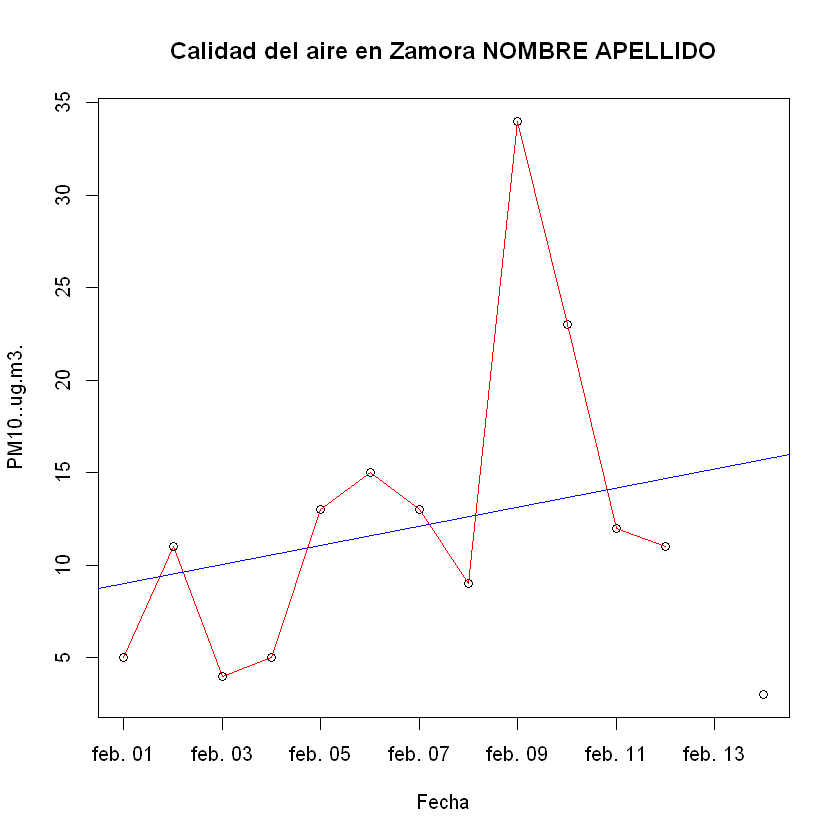

In [20]:
plot(PM10..ug.m3. ~ Fecha, data=subset(datosZA2014, Fecha >= "2014-02-01" & Fecha <= "2014-02-14"), main = "Calidad del aire en Zamora NOMBRE APELLIDO")
lines(PM10..ug.m3. ~ Fecha, data = subset(datosZA2014, Fecha >= "2014-02-01" & Fecha <= "2014-02-14"), col = "red")
fit1 <- lm(PM10..ug.m3. ~ Fecha, data = subset(datosZA2014, Fecha >= "2014-02-01" & Fecha <= "2014-02-14"))
abline(fit1, col = "blue")

La línea roja representa la unión de los valores de PM10 en las fechas indicadas y la línea azul indica la tendencia de los valores, como podemos observar la tendencia es al alza, lo que indica que el nivel de partículas PM10 en Zamora aumenta en las fechas mostradas.

In [21]:
realPM10 <- subset(datosZA2014, Fecha >= "2014-02-01" & Fecha <= "2014-02-14")
realPM10 <- realPM10$PM10..ug.m3.
predPM10 <- predict(fit1, subset(datosZA2014, Fecha >= "2014-02-01" &Fecha <= "2014-02-14"))
errorPM10 <- realPM10 - predPM10
errorPM10 <- errorPM10[!is.na(errorPM10)]
sum(errorPM10^2) / length(errorPM10)

[1] 62.88601

El valor obtenido en la última línea es el error cuadrático medio, que cuantifica la diferencia promedio al cuadrado entre los valores predichos por un modelo y los valores reales observados. En este caso el valor obtenido es: **62.88601**. Un ECM más bajo podría indicar un mejor modelo, pero no es suficiente considerar solo este valor para evaluar completamente a un modelo. Si se crease otro modelo y obtuviéramos un valor superior, eso indicaría que el modelo creado anteriormente tiene un rendimiento superior y, por tanto, sería mejor.

Ahora haremos predicciones para los valores que faltan en las fechas 12 y 13 de Febrero de 2024 usando regresión lineal.

In [22]:
subset(datosZA2014, Fecha == "2014-02-12")$PM10..ug.m3.
subset(datosZA2014, Fecha == "2014-02-13")$PM10..ug.m3.
datosZA2014$PM10..ug.m3.[datosZA2014$Fecha == "2014-02-12"] <- predict(fit1, data.frame(Fecha = as.Date("2014-02-12")))
datosZA2014$PM10..ug.m3.[datosZA2014$Fecha == "2014-02-13"] <- predict(fit1, data.frame(Fecha = as.Date("2014-02-13")))
subset(datosZA2014, Fecha == "2014-02-12")$PM10..ug.m3.
subset(datosZA2014, Fecha == "2014-02-13")$PM10..ug.m3.

[1] 11

[1] NA

[1] 14.70087

[1] 15.21823

El regresor lineal ha estimado los siguientes valores para las fechas faltantes:
· 12-02-2014: **14.70087**
· 13-02-2014: **15.21823**